In [28]:
!python --version

Python 3.11.11


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle


In [1]:
drive_path = "/content/drive/MyDrive/CIFAKE/data"


In [ ]:
import shutil

dataset_path = "/root/.cache/kagglehub/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/versions/3"

# Copy dataset to Google Drive
shutil.copytree(dataset_path, drive_path, dirs_exist_ok=True)

print(f"Dataset saved in Google Drive at: {drive_path}")


Dataset saved in Google Drive at: /content/drive/MyDrive/CIFAKE/data


In [ ]:
!nvidia-smi


Fri Apr  4 14:44:41 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   50C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import cv2
import os

# Path to an example image (change accordingly)
image_path = "/content/drive/MyDrive/CIFAKE/data/test/REAL"

# Get a random image from the folder
image_name = os.listdir(image_path)[0]
image = cv2.imread(os.path.join(image_path, image_name))

# Print the shape (Height, Width, Channels)
print(f"Image Shape: {image.shape}")  # Example output: (256, 256, 3)


Image Shape: (32, 32, 3)


In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [12]:
# Define dataset paths
train_dir = "/content/drive/MyDrive/CIFAKE/data/dataset/train"
test_dir = "/content/drive/MyDrive/CIFAKE/data/dataset/test"

In [13]:
# Image parameters
img_height, img_width = 224, 224
batch_size = 32

In [14]:
# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(img_height, img_width), batch_size=batch_size,
    class_mode='binary', subset='training')

val_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(img_height, img_width), batch_size=batch_size,
    class_mode='binary', subset='validation')

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(img_height, img_width), batch_size=batch_size,
    class_mode='binary')

Found 128 images belonging to 2 classes.
Found 32 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [ ]:
# Model definition
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train model
epochs = 5
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)
# Train model
epochs = 5
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)


Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 324s 130ms/step - accuracy: 0.9498 - loss: 0.1308 - val_accuracy: 0.9298 - val_loss: 0.1876
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 384s 130ms/step - accuracy: 0.9685 - loss: 0.0830 - val_accuracy: 0.9311 - val_loss: 0.2200
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 340s 136ms/step - accuracy: 0.9809 - loss: 0.0522 - val_accuracy: 0.9237 - val_loss: 0.2627
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 321s 128ms/step - accuracy: 0.9874 - loss: 0.0346 - val_accuracy: 0.9272 - val_loss: 0.2991
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 345s 137ms/step - accuracy: 0.9912 - loss: 0.0261 - val_accuracy: 0.9217 - val_loss: 0.4371


In [ ]:
# Save the model
model.save("/content/drive/MyDrive/CIFAKE/CNN_model.h5")
print("CNN  model saved!")


Xception model saved!


In [ ]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 65s 104ms/step - accuracy: 0.9194 - loss: 0.4615
Test Accuracy: 0.9164


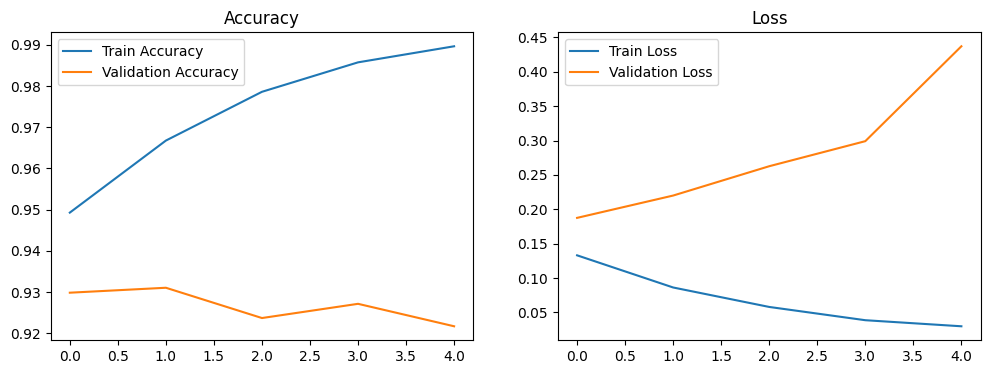

In [ ]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")
plt.show()

**XCEPTION**

In [25]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load pre-trained Xception model (without top layers)
base_model = Xception(weights="imagenet", include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False  # Freeze base layers

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dense(64, activation="relu")(x)
output = Dense(1, activation="sigmoid")(x)  # Binary classification

# Create model
model_xception = Model(inputs=base_model.input, outputs=output)
model_xception.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history_xception = model_xception.fit(train_generator, validation_data=val_generator, epochs=5, verbose=1)


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8833 - loss: 0.3781 - val_accuracy: 1.0000 - val_loss: 0.0049
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 255ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 1.0000 - val_loss: 1.5213e-04
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 267ms/step - accuracy: 1.0000 - loss: 9.8853e-05 - val_accuracy: 1.0000 - val_loss: 1.5206e-05
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 277ms/step - accuracy: 1.0000 - loss: 1.3427e-05 - val_accuracy: 1.0000 - val_loss: 3.0006e-06
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step - accuracy: 1.0000 - loss: 2.2338e-06 - val_accuracy: 1.0000 - val_loss: 9.4435e-07


In [ ]:
# Save the model
model_xception.save("/content/drive/MyDrive/CIFAKE/Xception_model.h5")
print("Xception model saved!")

**RESNET50**

In [15]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load pre-trained ResNet50 model (without top layers)
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False  # Freeze base layers

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dense(64, activation="relu")(x)
output = Dense(1, activation="sigmoid")(x)  # Binary classification

# Create model
model_resnet = Model(inputs=base_model.input, outputs=output)
model_resnet.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history_resnet = model_resnet.fit(train_generator, validation_data=val_generator, epochs=5, verbose=1)



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 1.0000 - loss: 0.2165 - val_accuracy: 1.0000 - val_loss: 0.0093
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 185ms/step - accuracy: 1.0000 - loss: 0.0064 - val_accuracy: 1.0000 - val_loss: 7.6560e-04
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - accuracy: 1.0000 - loss: 5.8210e-04 - val_accuracy: 1.0000 - val_loss: 1.2973e-04
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step - accuracy: 1.0000 - loss: 1.0526e-04 - val_accuracy: 1.0000 - val_loss: 3.5800e-05
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step - accuracy: 1.0000 - loss: 3.1289e-05 - val_accuracy: 1.0000 - val_loss: 1.3717e-05


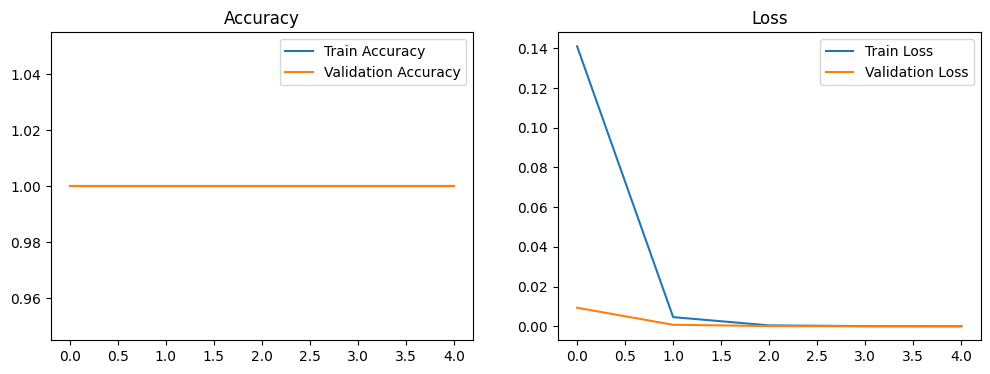

In [17]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'], label='Train Accuracy')  # Access history directly
plt.plot(history_resnet.history['val_accuracy'], label='Validation Accuracy')  # Access history directly
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['loss'], label='Train Loss')  # Access history directly
plt.plot(history_resnet.history['val_loss'], label='Validation Loss')  # Access history directly
plt.legend()
plt.title("Loss")
plt.show()

In [ ]:
# Save the model
model_resnet.save("/content/drive/MyDrive/CIFAKE/ResNet_model.h5")
print("ResNet50 model saved!")


**MOBILENETV2**

In [18]:
from tensorflow.keras.applications import MobileNetV2

# Load pre-trained MobileNetV2 model (without top layers)
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False  # Freeze base layers

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dense(64, activation="relu")(x)
output = Dense(1, activation="sigmoid")(x)  # Binary classification

# Create model
model_mobilenet = Model(inputs=base_model.input, outputs=output)
model_mobilenet.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history_mobilev2 = model_mobilenet.fit(train_generator, validation_data=val_generator, epochs=5, verbose=1)



9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.5479 - loss: 0.5813 - val_accuracy: 1.0000 - val_loss: 0.0092
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 1.0000 - loss: 0.0053 - val_accuracy: 1.0000 - val_loss: 2.2157e-04
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - accuracy: 1.0000 - loss: 1.6406e-04 - val_accuracy: 1.0000 - val_loss: 1.5009e-05
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step - accuracy: 1.0000 - loss: 9.6871e-06 - val_accuracy: 1.0000 - val_loss: 2.1963e-06
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - accuracy: 1.0000 - loss: 1.4262e-06 - val_accuracy: 1.0000 - val_loss: 5.5724e-07


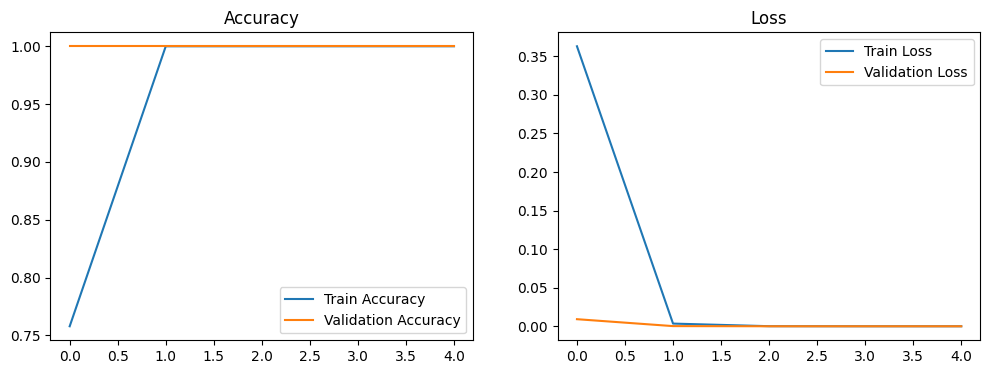

In [19]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_mobilev2.history['accuracy'], label='Train Accuracy')
plt.plot(history_mobilev2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history_mobilev2.history['loss'], label='Train Loss')
plt.plot(history_mobilev2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")
plt.show()

In [ ]:
# Save the model
model_mobilenet.save("/content/drive/MyDrive/CIFAKE/MobileNet_model.h5")
print("MobileNetV2 model saved!")


**EfficientNetB0**

In [20]:
from tensorflow.keras.applications import EfficientNetB0

# Load pre-trained EfficientNetB0 model (without top layers)
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False  # Freeze base layers

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dense(64, activation="relu")(x)
output = Dense(1, activation="sigmoid")(x)  # Binary classification

# Create model
model_efficientnet = Model(inputs=base_model.input, outputs=output)
model_efficientnet.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history_eff = model_efficientnet.fit(train_generator, validation_data=val_generator, epochs=5, verbose=1)




16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 1.0000 - loss: 0.3881 - val_accuracy: 1.0000 - val_loss: 0.0368
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - accuracy: 1.0000 - loss: 0.0257 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 1.6771e-04
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 1.0000 - loss: 1.6869e-04 - val_accuracy: 1.0000 - val_loss: 2.5905e-05
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 1.0000 - loss: 2.6727e-05 - val_accuracy: 1.0000 - val_loss: 6.4415e-06


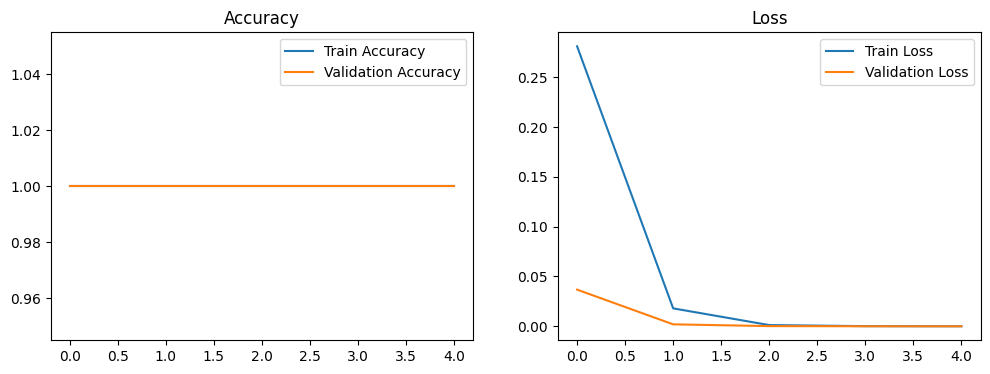

In [21]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_eff.history['accuracy'], label='Train Accuracy')
plt.plot(history_eff.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history_eff.history['loss'], label='Train Loss')
plt.plot(history_eff.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")
plt.show()

**VGG16**

In [22]:
from tensorflow.keras.applications import VGG16

# Load pre-trained VGG16 model (without top layers)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False  # Freeze base layers

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dense(64, activation="relu")(x)
output = Dense(1, activation="sigmoid")(x)  # Binary classification

# Create model
model_vgg16 = Model(inputs=base_model.input, outputs=output)
model_vgg16.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history_vgg = model_vgg16.fit(train_generator, validation_data=val_generator, epochs=5, verbose=1)




58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 559ms/step - accuracy: 1.0000 - loss: 0.3609 - val_accuracy: 1.0000 - val_loss: 0.0840
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 263ms/step - accuracy: 1.0000 - loss: 0.0633 - val_accuracy: 1.0000 - val_loss: 0.0171
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step - accuracy: 1.0000 - loss: 0.0137 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 6.6572e-04


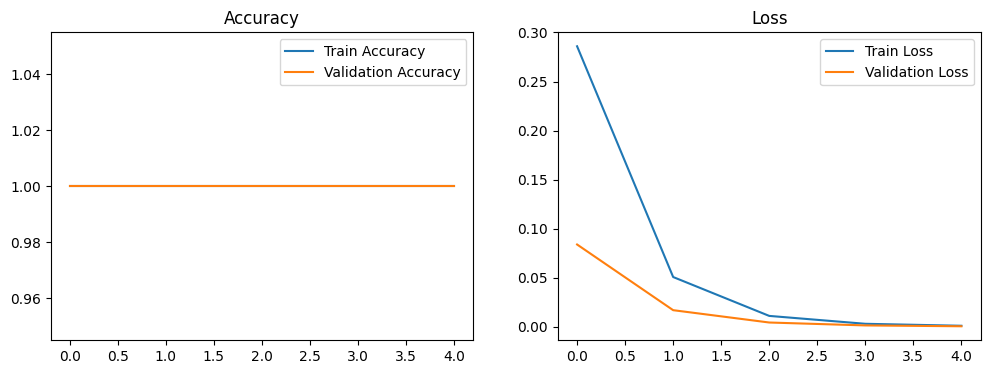

In [23]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['loss'], label='Train Loss')
plt.plot(history_vgg.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")
plt.show()

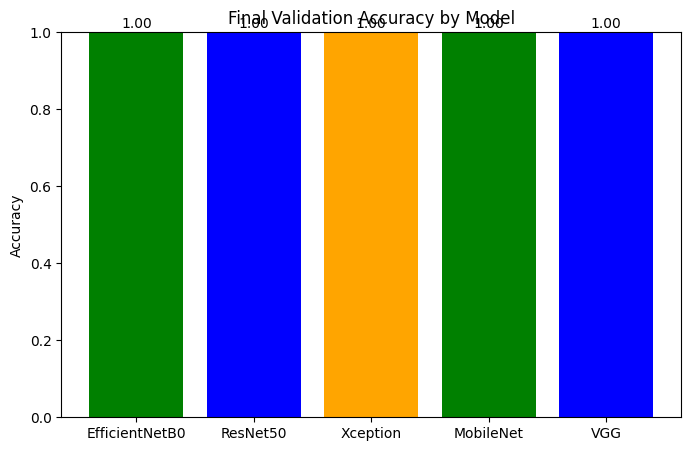

In [27]:
models = ['EfficientNetB0', 'ResNet50', 'Xception', 'MobileNet', 'VGG']
accuracies = [
    history_eff.history['val_accuracy'][-1],
    history_resnet.history['val_accuracy'][-1],
    history_xception.history['val_accuracy'][-1],
    history_mobilev2.history['val_accuracy'][-1],
    history_vgg.history['val_accuracy'][-1]
]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['green', 'blue', 'orange'])
plt.title('Final Validation Accuracy by Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')
plt.show()
